# Contenidos

* [1. Matplotlib y Seaborn](#1.-Matplotlib-y-Seaborn)
	* [1.1 Introducción](#1.1-Introducción)
	* [1.2 plot](#1.2-plot)
	* [1.3 Rótulos y títulos](#1.3-Rótulos-y-títulos)
	* [1.4 Color y estilo de lineas](#1.4-Color-y-estilo-de-lineas)
	* [1.5 AJustar limites del gráfico](#1.5-AJustar-limites-del-gráfico)
	* [1.6 Leyendas](#1.6-Leyendas)
	* [1.7 Gráficos de dispersión](#1.7-Gráficos-de-dispersión)
	* [1.8 Visualizando errores](#1.8-Visualizando-errores)
	* [1.9 Guardar figuras](#1.9-Guardar-figuras)
	* [1.10 Subgráficos](#1.10-Subgráficos)
	* [1.11 Estilos](#1.11-Estilos)
	* [1.12 Seaborn](#1.12-Seaborn)
	* [1.13 Para seguir leyendo](#1.13-Para-seguir-leyendo)


In [22]:
# permite que los graficos aparezcan embebidos en la notebook
%matplotlib inline  
import matplotlib.pyplot as plt  # Esta es la convencion más usada para importar matplotlib
import seaborn as sns # estándar para importar seaborn
sns.set_color_codes()  # Fija los nombres cortos para los colores según la paleta de seaborn
import numpy as np
import math

# 1. Matplotlib y Seaborn

## 1.1 Introducción

Matplotlib es quizá la librería para hacer gráficos más popular de Python. Esta librería fue desarrollada con la finalidad de portar a Python las capacidades de generar gráficos de MATLAB y funciona de forma integrada con NumPy y SciPy. Matplotlib esta diseñado de forma tal que se pueden crear gráficos simples con pocas lineas de código. De todas formas es posible modificar cada uno de los aspectos de los gráficos lo que permite crear gŕaficos arbitrariamente complejos, si uno esta dispuesto a escribir el código necesario.

La necesidad de gráficos más modernos y cambios producidos como parte de la disciplina emergente llamada _ciencia de datos_ han provocado críticas en la comunidad de Python hacia matplotlib, parte de estas criticas se han plasmado en el surgimiento de nuevas librerias y parte en la incorporación de cambios en el propio Matplotlib. Una de estas nuevas librerias es Seaborn. Esta librería no es un remplazo de matplotlib si no un complemento o extensión que logra corregir algunos problemas logicos de una librería nacida hace más de 15 años. Por un lado la paleta de colores y otros valores por defecto no son los más adecuados ni estéticamente ni funcionalmente. POr otro Matplotlib es previo a una librería llamada Pandas (muy usada en _ciencia de datos_) y por lo tanto Matplotlib _no se lleva muy bien_ con Pandas. Además Matplotlib es relativamente de bajo nivel, lo que posibilita perzonalizar hasta el último detalle de un gráfico como contraparte un gráfico relativamente complejo requerirá de código relativamente complejo. Seaborn nace en respuestas a todos estos inconvenientes al tiempo que mantiene los beneficios de Matplotlib, de hecho seaborn está escrito usando Matplotlib!

## 1.2 Plot

La función más simple para hacer una gráfica es _plot()_. Si le pasamos un _array_ devuelve lo siguiente.

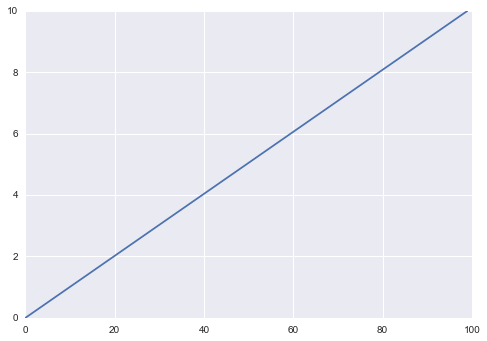

In [2]:
x = np.linspace(0, 10, 100)
plt.plot(x);

## 1.3 Rótulos y títulos

Interpretar un gráfico sin que los ejes estén rotulados puede ser bastante dificil o al menos conducir a confusiones, a veces también es util agregar títulos a los gráficos. Los rótulos pueden ser _strings_ de Python o puede ser código $\LaTeX$.

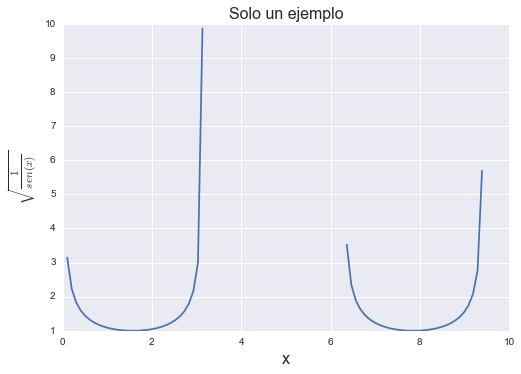

In [3]:
plt.plot(x, (1/np.sin(x))**0.5)
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$\sqrt{\frac{1}{sen(x)}}$', fontsize=16);
plt.title('Solo un ejemplo', fontsize=16);

## 1.4 Color y estilo de lineas

Cambiar el color y el estilo de las lineas es otra tarea usual al hacer gráficos. Si no especificamos valores para los colores pero realizamos más de un gráfica, entonces matplotlib automáticamente asignará distintos colores a las lineas siguiendo una paleta de colores predefenida. En este caso como además de matplotlib hemos importando seaborn, la paleta de colores es la paleta por defecto de seaborn y no la de matplotlib.

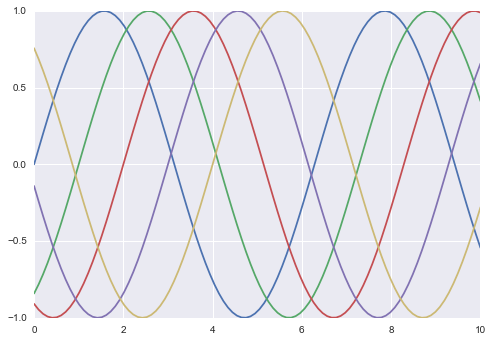

In [4]:
for i in range(5):
    plt.plot(x, np.sin(x-i))

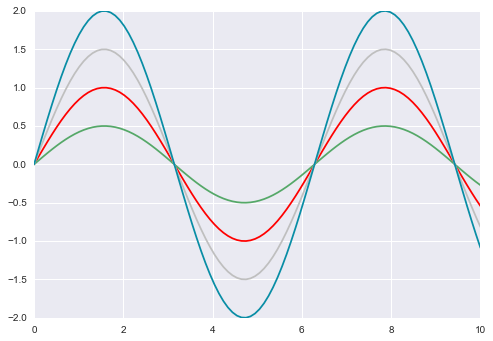

In [5]:
plt.plot(x, np.sin(x), color='red')
plt.plot(x, np.sin(x)*0.5, color='g') # otras opciones son rgb cmyk w
plt.plot(x, np.sin(x)*1.5, color='0.75') # escala de grises 0 negro - 1 blanco
plt.plot(x, np.sin(x)*2, color='#088da5') # hexadecimal

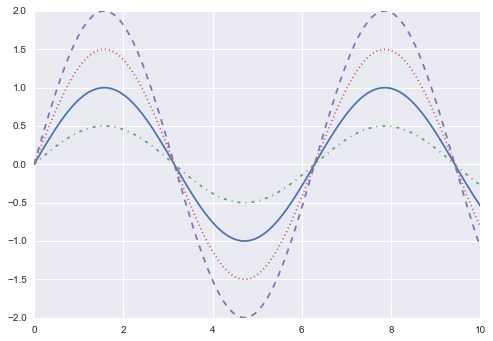

In [6]:
plt.plot(x, np.sin(x), linestyle='-')
plt.plot(x, np.sin(x)*0.5, linestyle='-.')
plt.plot(x, np.sin(x)*1.5, linestyle=':') 
plt.plot(x, np.sin(x)*2, linestyle='--');

Tambien es posible mezclar la definición del color (usando el código rgb-cmyk-w) y del estilo de linea es un solo argumento.

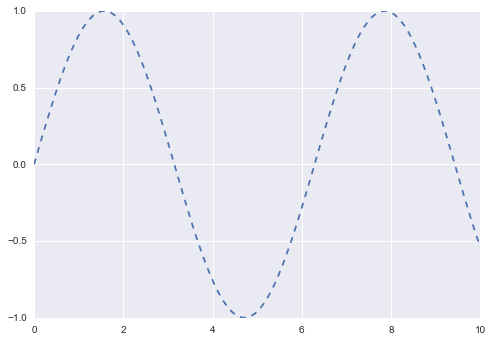

In [7]:
plt.plot(x, np.sin(x), 'b--');

## 1.5 AJustar limites del gráfico

Matplotlib ajusta los límites del gráfico de forma automática, pero hay veces que ese ajuste automático no se ajusta a nuestras necesidades por lo que puede ser necesario fijar los limites manualmente.

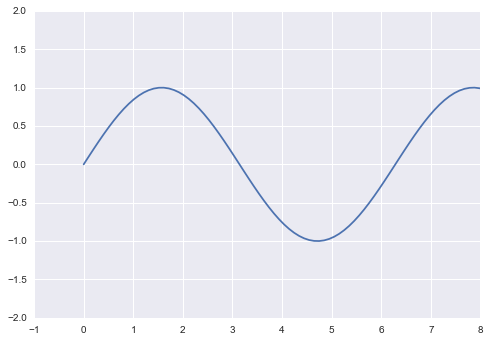

In [8]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 8)
plt.ylim(-2, 2);

Otro comando que puede ser de utilidad para fijar los limites de los ejes es _axis()_. El cual permite fijar los 4 límites en eun solo paso.

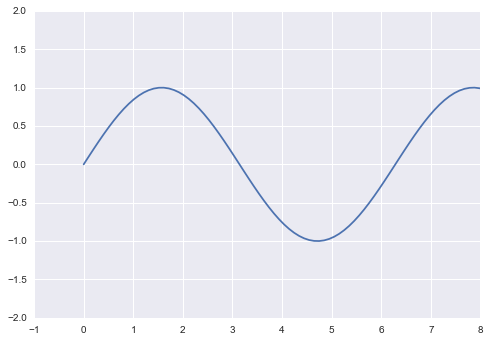

In [9]:
plt.plot(x, np.sin(x))
plt.axis([-1, 8, -2, 2]);

Además _axis()_ soporta como argumentos una serie de _strings_  como _equal_, _tight_, _off_ etc.

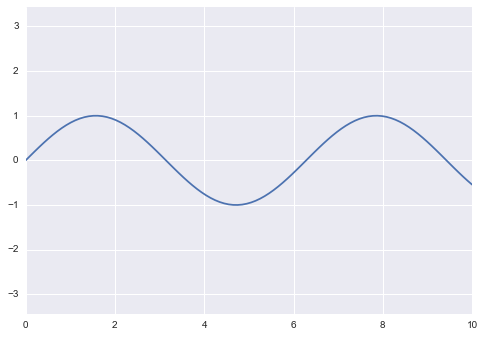

In [10]:
plt.plot(x, np.sin(x))
plt.axis('equal');

## 1.6 Leyendas

El comando _legend()_ permite agregar leyedas a los gráficos, el texto lo toma del arugmento _label_ de cada función que grafique algo. Legend (como otras funciones de matplotlib) tiene muchas opciones para personalizar los gráficos. Una de ellas es _loc_, que permite especificar la ubicación donde aparecerá la leyenda, cuando _loc=0_ o _loc='best'_ matplotlib tratará de ubicar la leyenda de forma que no se solape con otros elementos de la figura.

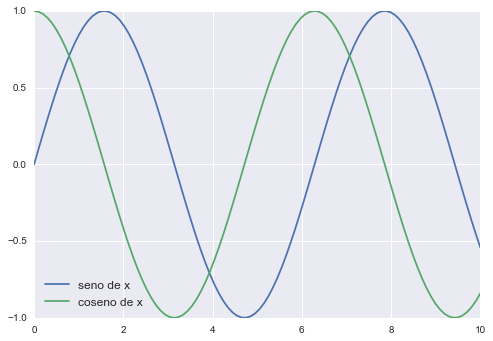

In [11]:
plt.plot(x, np.sin(x), label='seno de x')
plt.plot(x, np.cos(x), label='coseno de x')
plt.legend(loc=0, fontsize=12); 

## 1.7 Gráficos de dispersión

Es posible usar la función _plot()_ para crear gŕaficos de dispersión. De todas formas matplotlib ofrece de una función dedicada específicamente a este tipo de gráficos. Usando la función plot podríamos hacer lo siguiente.

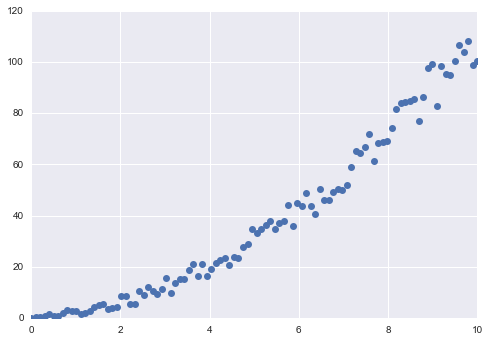

In [12]:
y = (x + np.random.rand(len(x)))**2
plt.plot(x, y, 'o');

Y usando _scatter()_

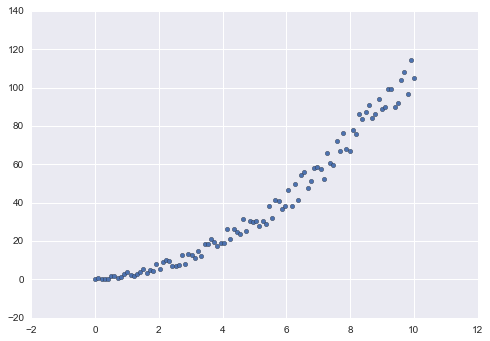

In [13]:
y = (x + np.random.rand(len(x)))**2
plt.scatter(x, y);

La principal diferencia entre _scatter()_ y _plot()_ es que el primero puede ser usado para asignar propiedades únicas a cada punto (color, tamaño, etc). La ventaja es que esto nos permite agregar una dimensión al gráfico (además de x e y). La contraparte es que _scatter()_ es más lento que _plot()_ (precisamente por que debe graficar cada punto por separado), esto solo se nota si la cantidad de puntos es muuuy grande.

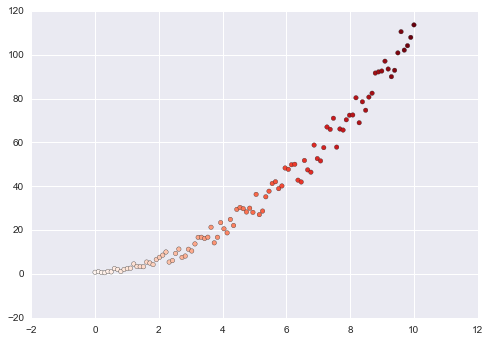

In [14]:
y = (x + np.random.rand(len(x)))**2
colors = x
plt.scatter(x, y, c=colors, cmap=plt.cm.Reds);

## 1.8 Visualizando errores

Un gráfico común en ciencias es aquel donde cada punto va acompañado de una barra de error, donde el error puede ser una de varias posibles medidas (como la desviación estándar o el error estándard, etc). 

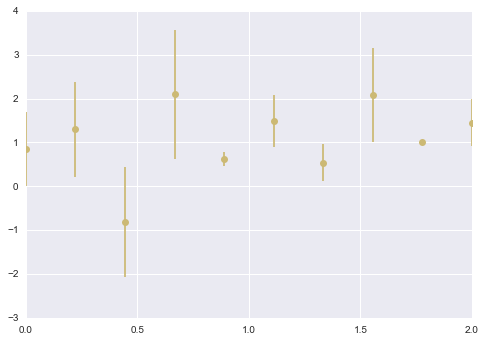

In [15]:
x = np.linspace(0, 2, 10)
error_y = np.random.randn(10)
y = np.sin(x) + error_y
plt.errorbar(x, y, yerr=error_y, fmt='oy');

## 1.9 Guardar figuras

Matplotlib permite guardar figuras en muchos formatos posibles, uno de los preferidos para el tipo de figuras que se suelen hacer en ciencia es el formato png

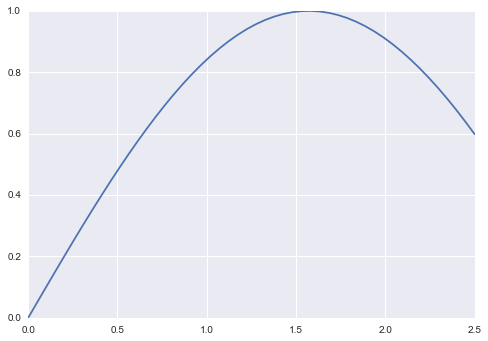

In [16]:
x = np.linspace(0, 2.5, 50)
y = np.sin(x)
plt.plot(x,y )
plt.savefig('una_figura.png');

Los siguientes comandos puede no funcionar en tu sistema operativo, el primero es cun comando de linux que muestra que la figura está en la misma carpeta que la notebook y el segundo llama al _visualizador de imágenes de ubuntu/gnome_

In [17]:
!ls -lh una_figura.png
!eog una_figura.png

-rw-rw-r-- 1 osvaldo osvaldo 15K feb 13 10:33 una_figura.png


## 1.10 Subgráficos

Muchas veces se hace necesario construir un gráfico con varios _paneles_ o _subgráficos_. Matplotlib contiene varias funciones para lograr este objetivo. La más básica de ellas es _subplot()_. Esta función toma tres argumentos, todos ellos enteros, el primero especifica la cantidad de filas, el segundo la cantidad de columnas y el tercero el índice del gráfico a crear.

El espacio entre subgráficos se puede ajustar manualmente (como practicamente todos los aspectos de un gráfico en matplotlib), pero la mayoría de las veces basta con escribir la función _tight_layout()_ que ajusta esto de forma automática.

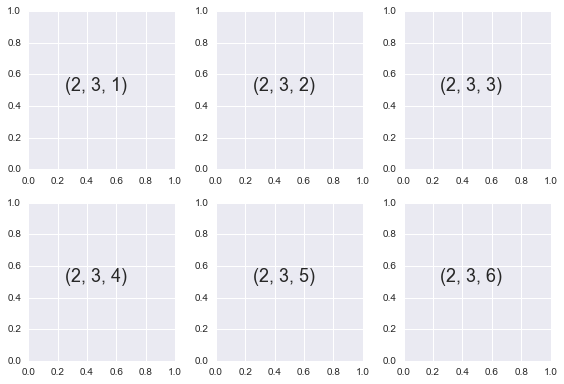

In [18]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.text(0.25, 0.5, str((2, 3, i+1)), fontsize=18)
plt.tight_layout()

## 1.11 Estilos

Desde la versión 1.4 Matplotlib incorpora una serie de estilos predefinidos y funciones para cambiar facilmente estre estos estilos. Seaborn también tiene sus propios estilos. De hecho el estilo por defecto de matplotlib "classic" es reemplazado por el estilo "seaborn-darkgrid". En la siguiente figura se pueden ver ambos estilos juntos con todos los estilos disponibles entre matplotlib y seaborn.

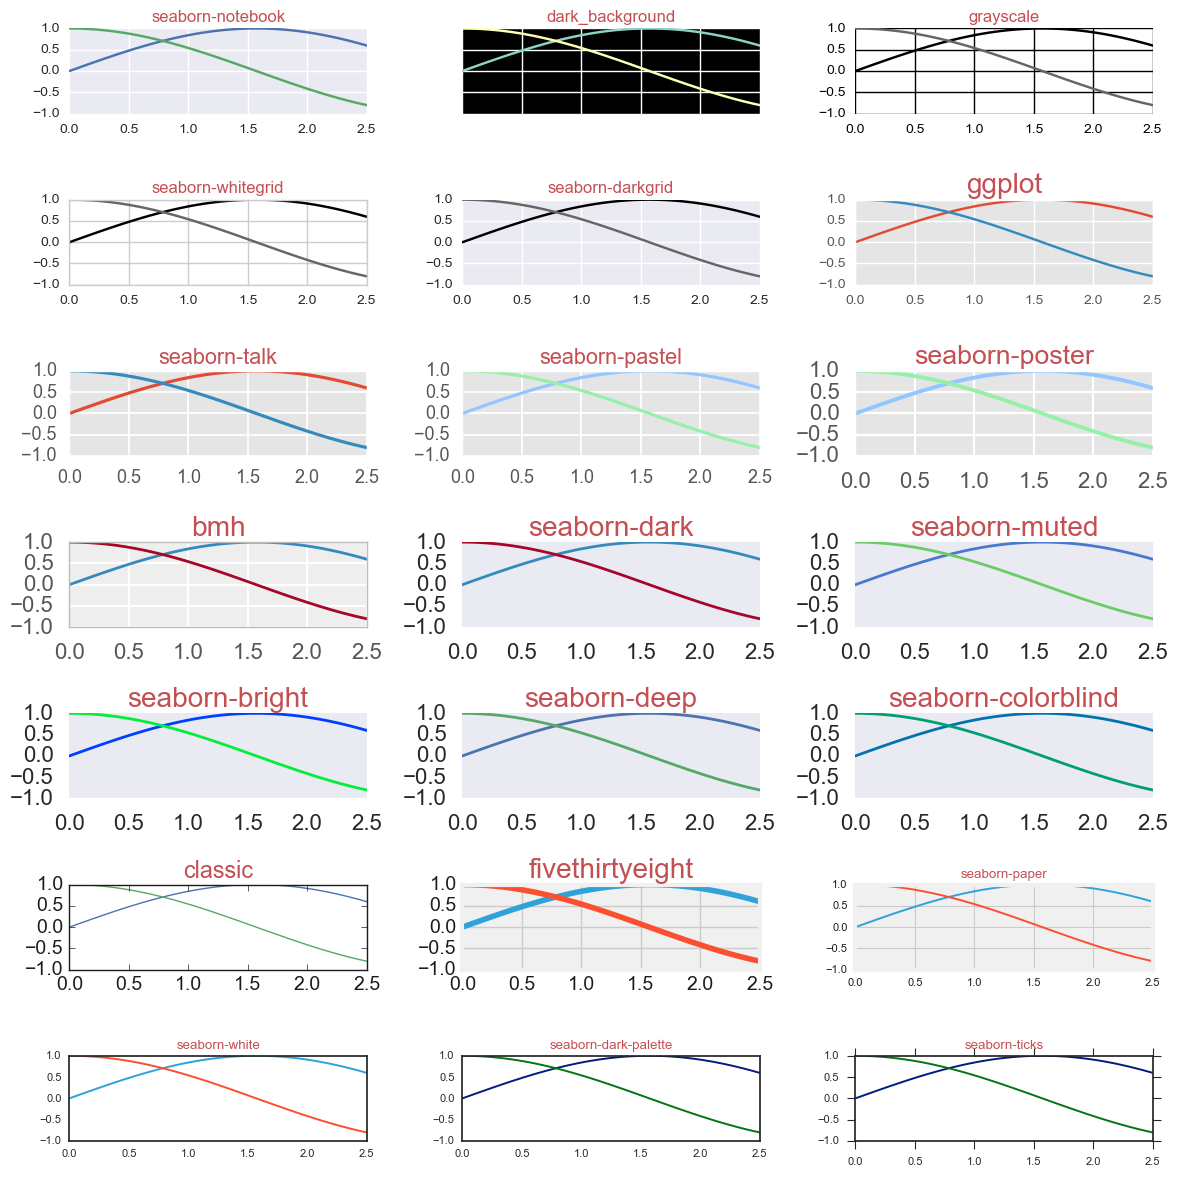

In [19]:
fig = plt.figure(figsize=(12, 12))
estilos = plt.style.available
for i, estilo in enumerate(estilos):
    plt.style.use(estilo)
    plt.subplot(math.ceil(len(estilos)/3), 3, i+1)
    plt.plot(x, np.sin(x), label='seno de x')
    plt.plot(x, np.cos(x), label='coseno de x')
    plt.title(estilo, color='r')
plt.tight_layout()
# ahora volvemos a los valores por defecto
plt.style.use('seaborn-darkgrid')

## 1.12 Seaborn

Seaborn incluye algunos conjuntos de datos y una función para importarlos, el principal objetivo es poder mostrar las capacidades de la librería. Seaborn incluye muchas funciones de alto nivel, el siguiente ejemplo tomado al azar de la [galería](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html) de seaborn, muestras como con una sola linea hacer un gráfico que requeríria de algunas decenas de lineas si usaramos matplotlib "puro".

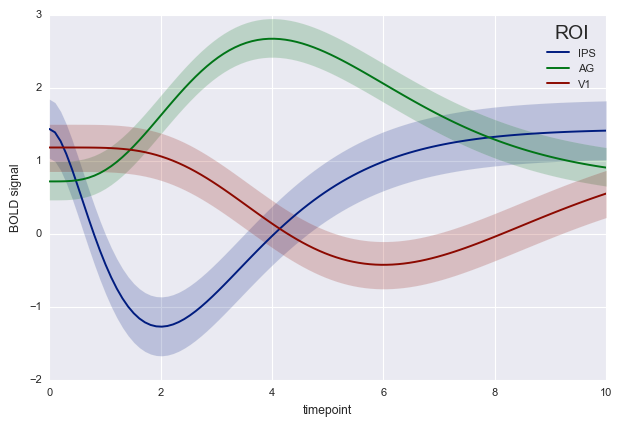

In [20]:
gammas = sns.load_dataset("gammas")

# Plot the response with standard error
sns.tsplot(data=gammas, time="timepoint", unit="subject",
           condition="ROI", value="BOLD signal");

## 1.13 Para seguir leyendo

* [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do)
* [simple-line-plots-with-matplotlib](https://www.oreilly.com/learning/simple-line-plots-with-matplotlib)
* [Galeria de matplotlib](http://matplotlib.org/gallery.html)
* [Galería de Seaborn](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html)

In [21]:
import sys, IPython, matplotlib, platform
print("Esta notebook fue creada en una computadora %s corriendo %s y usando:\nPython %s\nIPython %s\nNumPy %s\nMatplotlib %s\nSeaborn %s" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, np.__version__, matplotlib.__version__, sns.__version__))

Esta notebook fue creada en una computadora x86_64 corriendo Ubuntu 15.10 y usando:
Python 3.5.0
IPython 4.1.0
NumPy 1.10.4
Matplotlib 1.5.1
Seaborn 0.7.0
